Ryan Grosso. 
Example 1 from ML Coursera

# Linear regression with one variable

In this exercise we will implement a linear regression with one variable to predict profits for a food truck. 
We are a CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and we have data for profits and populations from the cities.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-notebook')

# 2.0 Linear regression 1D

In [2]:
#What type of data do we have? --> comma sep : profit,population
data_file = 'data/ex1data1.txt'

#Bring in the data
cols = np.loadtxt(data_file,delimiter=',',usecols=(0,1),unpack=True)
# Make the X Matrix from cols. --> cols[:1] is a [ [population....] ] and cols[1:2] is a [ [profit ] ]
# This a in list(row) form so we need to transpose
X = np.transpose(np.array(cols[:1])) # This is population... its a  m X 1 vector 1 is the amount of features 
y = np.transpose(np.array(cols[1:2])) # This is the profit... its a m X 1 vector 
# add the 1 for theta0... this maces it a mX(n+1) or mX2 matrix 
X = np.insert(X,0,1,axis=1) 
#If we print out the shape we get a good intuition of what the objects are
print X.shape
print y.shape
print 'we have {} many samples'.format(len(y))

(97, 2)
(97, 1)
we have 97 many samples


### 2.1 Plot the data

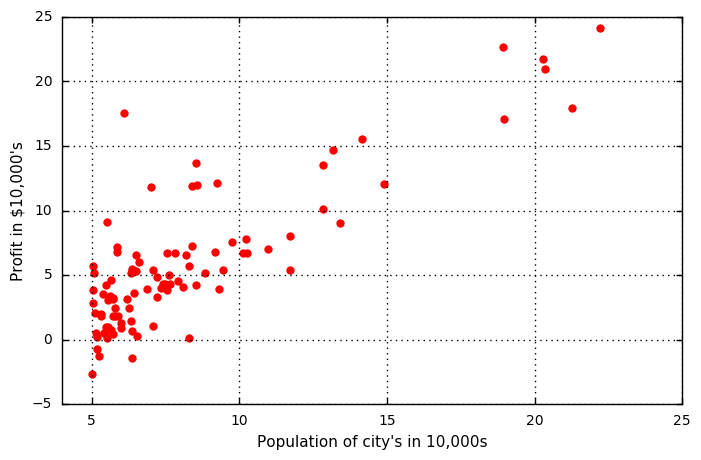

In [3]:
def plot_data():
    plt.figure(figsize=(8,5))
    plt.plot(X[:,1:],y[:],"or",markersize=6)
    plt.grid(True)
    plt.xlim(4,25)
    plt.ylim(-5,25)
    plt.xlabel("Population of city's in 10,000s")
    plt.ylabel("Profit in $10,000's")
    plt.show()
plot_data()

## Gradient Descent

In [4]:
# Definition for hypothesis 
def h(theta,x):
    # this is [ x=[1,pop] ]{mXn+2} and [theta=[0,0]]{n+1X1} 
    #We need to make this into mX1
    return np.dot(x,theta)

def cost(Theta_values,X,y,m):
    # cost is 1/(2m) (trans(h-y){1Xm} (h-y){mX1}) 
    # Here we remeber that sum(h-y)
    j = (1./(2*m)) * np.dot( np.transpose(h(Theta_values,X)-y),h(Theta_values,X)-y) 
    return float(j)

#Initialize theta values to 0 0
myTheta = np.zeros((2,1))# this means (row,cols)

#This cost should be 32.07
print cost(myTheta,X,y,len(y))

32.0727338775


#### Gradient Descent
Here we will actually implement the gradient descent algo

In [5]:
# put together a function to run the gradient descent \
def Gradient_descent(X,y,initial_theta,alpha,iteration_steps):
    # we to have a few things returned that will be useful later: 
    # 1. value of the cost log
    cost_hist = []
    # 2. theta value at this step
    theta = initial_theta
    # 3. value of theta history
    theta_hist = []
    
    # now we are going to take iterations/steps to and minimize along the way 
    m = len(y) #is the number of training samples
    for blah in range(iteration_steps):
        #First fill out the cost and theta with what we have now for params 
        theta_hist.append(list(theta[:,0]))#quick hack since we have np arrays
        currentcost= cost(theta,X,y,m)
        cost_hist.append(currentcost)        
        #loop over each of the theta params and update the value of each param 
        temp_theta = theta#make a temp theta
        for t in range(len(temp_theta)):
            # mind the lame math notation im gonna use here...
            # thetha_update = theta_current - alpha *  del*j(theta)/(del*theta) 
            # dj/dthe = sum over a all samples (h(x)-y)*x_j where j is the param of interest
            #Remeber that we need to shape things into the proper notation. Rows and colums 
            # To recap y{mX1} : X{mXn+1} theta{n+1,1}
            temp_theta[t] = theta[t] - (alpha/m)  * np.sum( (h(initial_theta,X)-y)* X[:,t].reshape(m,1))
        theta = temp_theta#Take the new params for theta and set them as current
    # After everything return the info
    return theta, theta_hist, cost_hist

In [6]:
# now lets actually run it. 
Initial_theta = np.zeros((X.shape[1],1))# shape is the shape of the object ( in this case 0=row,1=cols)
final_theta, hist_theta, hist_cost = Gradient_descent(X,y,Initial_theta,0.01,2000)

(4, 6.5)

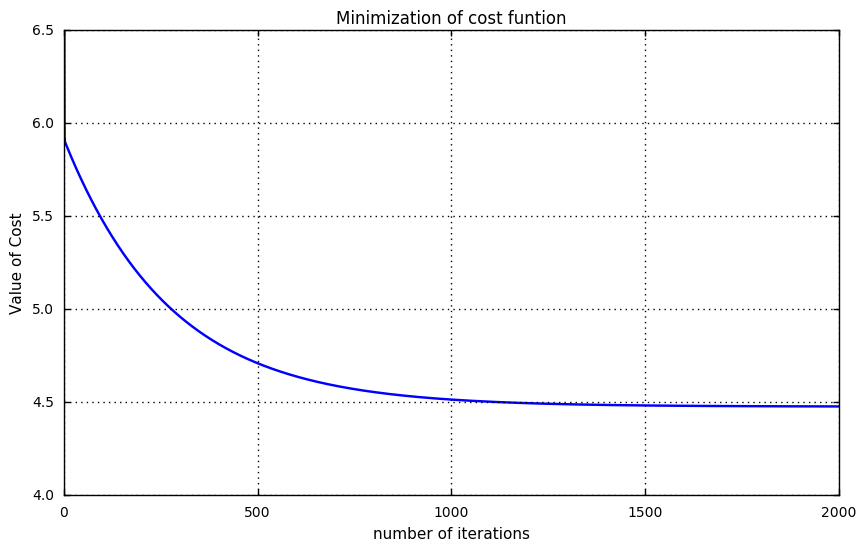

In [7]:
#Plot Convergance 
def plot_converge(j_cost):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(j_cost)),j_cost,"-")
    #plt.ylim(4,6.5)
    plt.grid(True)
    plt.xlabel("number of iterations")
    plt.ylabel("Value of Cost")
    plt.title("Minimization of cost funtion")
    
plot_converge(hist_cost)
plt.ylim(4,6.5)


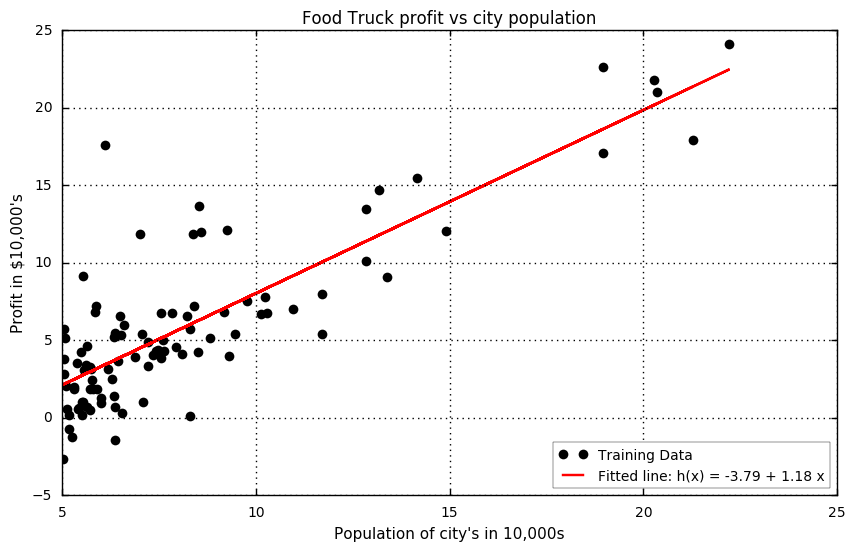

In [8]:
#Plot the fitted line 
def the_fit(pop_value):
    return final_theta[0]+final_theta[1]*pop_value
def fitline(final_theta):
    plt.figure(figsize=(10,6))
    plt.plot(X[:,1],y[:],"ko",label= 'Training Data')
    #plot the fit 
    plt.plot(X[:,1],the_fit(X[:,1]),"r-",label= 'Fitted line: h(x) = %0.2f + %0.2f x'%(final_theta[0],final_theta[1]))
    plt.title('Food Truck profit vs city population')
    plt.xlabel("Population of city's in 10,000s")
    plt.ylabel("Profit in $10,000's")
    plt.grid(True)
    plt.legend(loc=4)
    plt.show()
    
fitline(final_theta)
    

### Visualize J($\theta$)

Here we would like to see what this cost function looks like and also see what our path for gradient descent was. Since we only have 1 feature we then have two params ($\theta_{0},\theta_{1})$ for the cost function. This means we can visualize a 2D surface. If we have more paramters/features it's ofcourse not easy to visualize 3 or more dimensions. 


In [9]:
#Find some param space to look prep the data for the cost to visualize
t0vals = np.arange(-30,20,.5)
t1vals = np.arange(-2,4,.1)

tx = []
ty = []
tz = []
for a in t0vals:
    tempa = []
    tempb = []
    tempc= []
    for b in t1vals:
        tempa.append(a)
        tempb.append(b)
        #find the cost 
        tempc.append(cost(np.array([[a], [b]]),X,y,len(y)))
    tx.append(tempa)
    ty.append(tempb)
    tz.append(tempc)

/home/ryan/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ryan/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


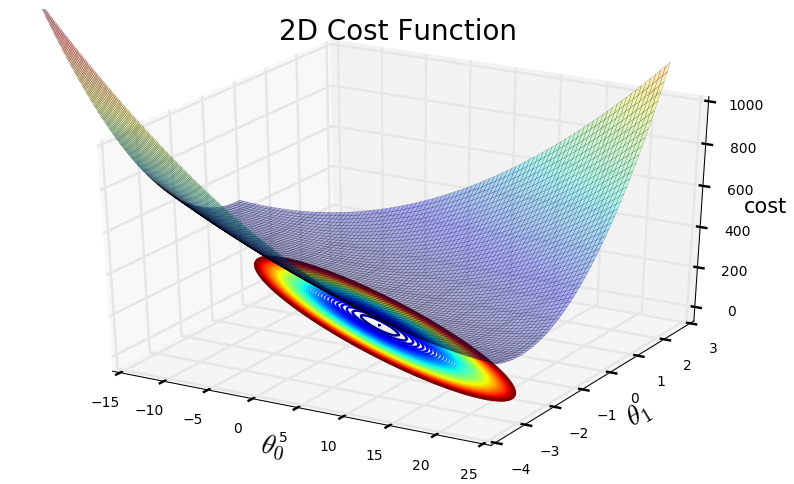

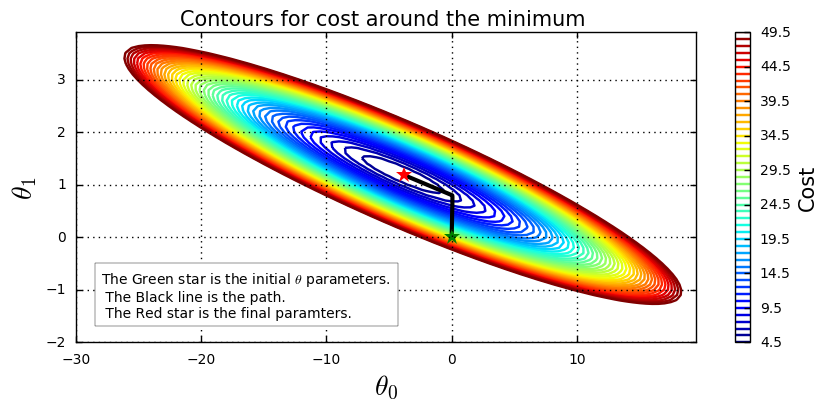

In [10]:
## Here we will make use some 'fancy' plotting tools :) 
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(10,6))
#make the 3d surface
ax = fig.gca(projection='3d')
ax.plot_surface(tx, ty, tz, rstride=1, cstride=1, alpha=0.3,cmap=cm.jet)
mylevel = np.arange(4.5,50,1)# how many levels for the contours
cset = ax.contour(tx, ty, tz, zdir='z',levels=mylevel, offset=-180, cmap=cm.jet)#plot the contours below

#set the bounds nice and label them
ax.set_xlabel(r'$\theta_0$',fontsize=20)
ax.set_xlim(-15, 25)
ax.set_ylabel(r'$\theta_1$',fontsize=20)
ax.set_ylim(-4, 3)
ax.set_zlabel('cost',fontsize=15)
ax.set_zlim(-50, 1000)
ax.set_title('2D Cost Function',fontsize=20)
#get it!
plt.show()

#look at the contours and the path travels from GD
fig = plt.figure(figsize=(10,4))
cont = plt.contour(tx, ty, tz,levels=mylevel, cmap=cm.jet)
#Show the colorbar
cbar = plt.colorbar(cont)
cbar.ax.set_ylabel('Cost',fontsize=15)

#plot our path from GD
plt.plot(np.array(hist_theta)[:,0],np.array(hist_theta)[:,1],'k-',linewidth=3.0)#here is the path
plt.plot(np.array(hist_theta)[0,0],np.array(hist_theta)[0,1],'g*',markersize=12)#here is the start point
plt.plot(np.array(hist_theta)[-1,0],np.array(hist_theta)[-1,1],'r*',markersize=12)#here is the end point

#Label and scale things
plt.title("Contours for cost around the minimum ",fontsize=15)
plt.text(-28, -1.5, r'The Green star is the initial $\theta$ ''parameters. \n The Black line is the path.\n The Red star is the final paramters.',bbox={'facecolor':'white'})
plt.xlabel(r'$\theta_0$',fontsize=20)
plt.ylabel(r"$\theta_1$",fontsize=20)
plt.grid(True)
#get it!
plt.show()

# Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file data/ex1data2.txt contains a training set of housing prices in Portland, Oregon.

In [11]:
#bring in the data and take a look at what we have
# For fun... let't try using pandas :) 
import pandas as pd
data_file_2 = 'data/ex1data2.txt'
df = pd.read_csv(data_file_2,delimiter=',',header=None)
df.columns=['house_size','N_bedrooms','price']

print 'raw data'
print df.head()
# We see very quickly that the house size is a few orders magnitude above N_bedrooms 
#to make GD go fast we want the features to be similiar scale 

#####RG REMOVE
#keep these for later
#Store_feature_mean = [] 
#Store_feature_std = []


#Lets make a function to pass scale for given features of interst 
feature_list = ['house_size','N_bedrooms']

#we are going to scale the features  by (x1 - x1.mean)/(stand_dev)
def feature_scale(featurelist,df=df):
    stor_feat_mean = []
    stor_feat_std = []
    for feat in featurelist:
        mean_ft =df[feat].mean()#make these so we don'e havve to compute in the lambda later
        std_ft=df[feat].std()#make these so we don'e havve to compute in the lambda later
        stor_feat_mean.append(mean_ft)
        stor_feat_std.append(std_ft)
        #use a lambda func to scale the column
        df[feat] = df[feat].apply(lambda x: (x-mean_ft)/std_ft)
    return df,stor_feat_mean, stor_feat_std    

#scale all the features
df, Store_feature_mean,Store_feature_std = feature_scale(feature_list)
print 'scaled features'
print df.head()

raw data
   house_size  N_bedrooms   price
0        2104           3  399900
1        1600           3  329900
2        2400           3  369000
3        1416           2  232000
4        3000           4  539900
scaled features
   house_size  N_bedrooms   price
0    0.130010   -0.223675  399900
1   -0.504190   -0.223675  329900
2    0.502476   -0.223675  369000
3   -0.735723   -1.537767  232000
4    1.257476    1.090417  539900


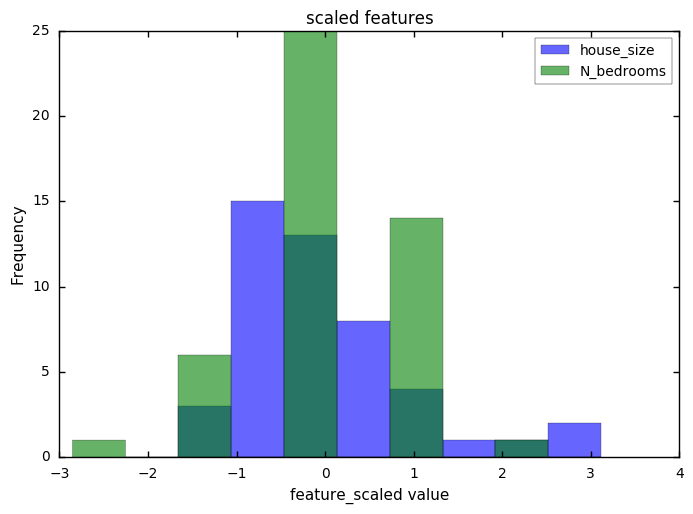

In [12]:
#lets look at the features after scaling and see if things are reasonable
df.drop('price', axis=1).plot.hist(alpha=0.6)
plt.xlabel('feature_scaled value')
plt.title('scaled features')
plt.show()

### Gradient descent
Let's set everything up and run gradient descent with the same reusable function from before

In [13]:
preX = df[feature_list]
ones = pd.DataFrame({'x0' : pd.Series([1 for x in range(len(preX))])})
#yes I know, clunky but I want show off pandas
X = pd.concat([ones,preX],axis=1)
print X.head()
#now we can just take a pandas df. Turn it into a numpy matrix
X = X.as_matrix()#now we have our X that can go into our cost function that we wrote before
y = df[['price']].as_matrix()
print X.shape #These are useful to debug
print y.shape #These are useful to debug


   x0  house_size  N_bedrooms
0   1    0.130010   -0.223675
1   1   -0.504190   -0.223675
2   1    0.502476   -0.223675
3   1   -0.735723   -1.537767
4   1    1.257476    1.090417
(47, 3)
(47, 1)


In [14]:
##lets run the minimization 
Initial_Theta = np.zeros((X.shape[1],1))# this means (row,cols)
final_theta, hist_theta, hist_cost = Gradient_descent(X,y,Initial_Theta,0.1,1500)# a little bigger step size

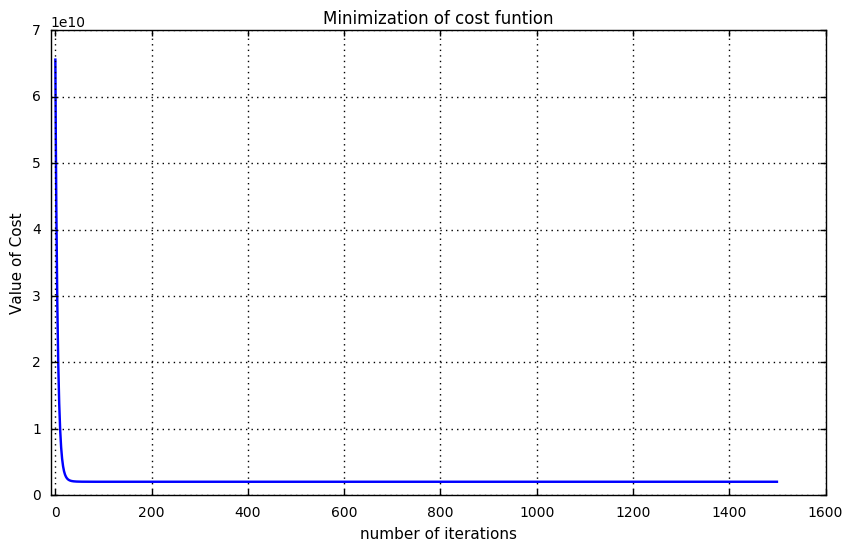

In [15]:
#Now we can easily plot cose convergance like before
plot_converge(hist_cost)
plt.xlim(-10,)
plt.show()

Next,use this value of θ to predict the price of a house with 1650 square feet and 3 bedrooms

In [16]:
#Function to get my fit
def my_fit(area,N_bd):
    #we have to move into feature space with values 
    #Storefeature[0] = area 
    #Storefeature[1] = n_bdr 
    area_scale = (area- Store_feature_mean[0])/Store_feature_std[0]
    nbd_scale = (N_bd - Store_feature_mean[1])/Store_feature_std[1]
    return float(final_theta[0]+final_theta[1]*area_scale +final_theta[2]*nbd_scale)

In [17]:
print 'For a house that is %.2f square feet and has %2d bedrooms is estimated to cost $%.2f '% (1650,3,my_fit(1650,3))

For a house that is 1650.00 square feet and has  3 bedrooms is estimated to cost $293081.46 


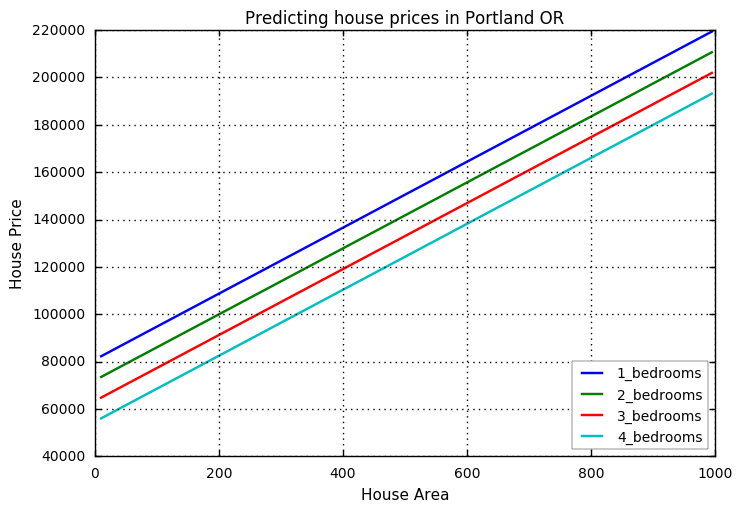

In [18]:
#Lets see how this looks for a few logical house choices
def plot_const_bed(bedroom):
    x = np.arange(10,1000,5)
    y = [my_fit(s,bedroom) for s in x]
    plt.plot(x,y,label='{}_bedrooms'.format(bedroom))
for a in range(1,5,1):
    plot_const_bed(a)
plt.xlabel("House Area")  
plt.ylabel("House Price")
plt.title("Predicting house prices in Portland OR")
plt.legend(loc=4)
plt.grid(True)
plt.show()

## Try using the normal equation method for Linear Regression 

In [19]:
from numpy.linalg import inv
#let's use this for quick inversion 
def normEqn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

#remeber to rescale the input data 
area_scale = (1650- Store_feature_mean[0])/Store_feature_std[0]
nbd_scale = (3 - Store_feature_mean[1])/Store_feature_std[1]
print 'For a house that is %.2f square feet and has %2d bedrooms is estimated to cost $%.2f '% (1650,3,h(normEqn(X,y),[1,area_scale,nbd_scale]))

For a house that is 1650.00 square feet and has  3 bedrooms is estimated to cost $293081.46 
